# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Observation
* The weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). 
* The southern hemisphere tends to be warmer this time of year than the northern hemisphere. 
* There is no strong relationship between latitude and cloudiness. 
* There is no strong relationship between latitude and wind speed.
* There is a flurry of cities with over 20 mph of wind in northern hemishere. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
import requests
import time
import json
import seaborn as sn

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
temp_units = "Imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="
count_one = 0
set_one = 1

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

##  Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print("Beginning Data Retrieval\n-----------------------------\n")

city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
        
# loop will break if the city isnt in the weather map
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-----------------------------

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | muroto
Processing Record 4 of Set 1 | luderitz
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | adrar
Processing Record 7 of Set 1 | amahai
Processing Record 8 of Set 1 | esperance
Processing Record 9 of Set 1 | acapulco
City not found. Skipping...
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | sao joao da barra
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | nanortalik
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | mumford
Processing Record 18 of Set 1 | cherskiy
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | leh
Processing Record 22 of Set 1 | totness
Processing Record 23 of Set 1 |

Processing Record 37 of Set 4 | klaksvik
Processing Record 38 of Set 4 | watsa
Processing Record 39 of Set 4 | marsaxlokk
Processing Record 40 of Set 4 | yulara
Processing Record 41 of Set 4 | lucapa
Processing Record 42 of Set 4 | san rafael
Processing Record 43 of Set 4 | muli
Processing Record 44 of Set 4 | paracuru
City not found. Skipping...
Processing Record 45 of Set 4 | alyangula
Processing Record 46 of Set 4 | dakar
Processing Record 47 of Set 4 | lompoc
Processing Record 48 of Set 4 | ilulissat
Processing Record 49 of Set 4 | aksarka
Processing Record 1 of Set 5 | coquimbo
Processing Record 2 of Set 5 | darhan
Processing Record 3 of Set 5 | ovsyanka
Processing Record 4 of Set 5 | phalaborwa
Processing Record 5 of Set 5 | yara
Processing Record 6 of Set 5 | vite
Processing Record 7 of Set 5 | alamos
Processing Record 8 of Set 5 | pointe-noire
Processing Record 9 of Set 5 | ahipara
Processing Record 10 of Set 5 | ponorogo
Processing Record 11 of Set 5 | havre
Processing Record 

Processing Record 28 of Set 8 | aklavik
Processing Record 29 of Set 8 | verkhnyaya inta
Processing Record 30 of Set 8 | goya
Processing Record 31 of Set 8 | iligan
City not found. Skipping...
Processing Record 32 of Set 8 | udachnyy
Processing Record 33 of Set 8 | puerto narino
Processing Record 34 of Set 8 | chuy
Processing Record 35 of Set 8 | northam
Processing Record 36 of Set 8 | balakhninskiy
Processing Record 37 of Set 8 | noyabrsk
Processing Record 38 of Set 8 | burlatskoye
Processing Record 39 of Set 8 | madhupur
Processing Record 40 of Set 8 | morgan city
Processing Record 41 of Set 8 | soe
Processing Record 42 of Set 8 | manzanillo
Processing Record 43 of Set 8 | killorglin
Processing Record 44 of Set 8 | darnah
Processing Record 45 of Set 8 | pocone
Processing Record 46 of Set 8 | kyren
Processing Record 47 of Set 8 | ayr
Processing Record 48 of Set 8 | camapua
City not found. Skipping...
City not found. Skipping...
Processing Record 49 of Set 8 | romitan
Processing Record 

Processing Record 16 of Set 12 | hualmay
City not found. Skipping...
Processing Record 17 of Set 12 | amherstburg
Processing Record 18 of Set 12 | providencia
Processing Record 19 of Set 12 | bowen
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_list = {"City":city_two,
                "Lat":lats,
                "Lng":lngs,
                "Max Temp":max_temps,
                "Humidity":humidities,
                "Cloudiness":cloudinesses,
                "Country":countries,
                "Wind Speed":wind_speeds,
                "Date":dates}
weather_df = pd.DataFrame(weather_list)
weather_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Country,Wind Speed,Date
0,punta arenas,8.99,125.34,83.64,79,11,PH,6.40,1606375343
1,kapaa,22.08,-159.32,75.20,94,75,US,9.17,1606375344
2,muroto,33.28,134.15,66.20,45,75,JP,5.82,1606375344
3,luderitz,-26.65,15.16,66.20,48,0,NA,17.22,1606375344
4,nikolskoye,59.70,30.79,42.01,93,75,RU,6.71,1606375345
5,adrar,20.50,-10.07,59.92,30,18,MR,4.18,1606375345
6,amahai,-3.33,128.92,85.17,72,100,ID,3.67,1606375345
7,esperance,-33.87,121.90,87.80,27,0,AU,9.17,1606375346
8,acapulco,16.86,-99.89,76.48,82,0,MX,3.44,1606375346
9,lebu,-37.62,-73.65,47.73,78,0,CL,15.03,1606375346


In [5]:
weather_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Country       558
Wind Speed    558
Date          558
dtype: int64

In [6]:
#weather_df.to_csv("..Data/cities_new.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
bad_humidity_df = weather_df[(weather_df['Humidity'] > 100)]
bad_humidity_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Country,Wind Speed,Date


In [8]:
#  Get the indices of cities that have humidity over 100%.
bad_humidity_df.index

Int64Index([], dtype='int64')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

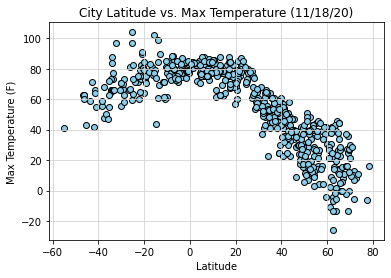

In [9]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (11/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig ("../Images/LatitudevsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

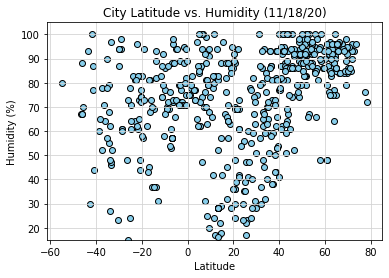

In [10]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (11/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig ("../Images/LatitudevsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

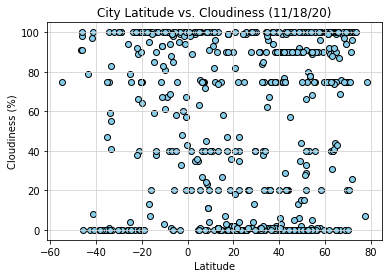

In [11]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (11/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig ("../Images/LatitudevsCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

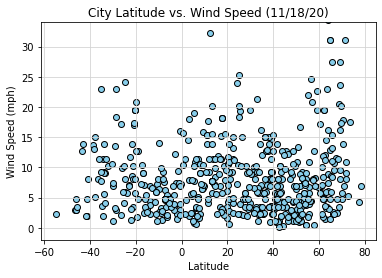

In [12]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (11/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig ("../Images/LatitudevsWindSpeed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [13]:
NH = weather_df.loc[weather_df["Lat"] >= 0]
NH.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Country,Wind Speed,Date
0,punta arenas,8.99,125.34,83.64,79,11,PH,6.40,1606375343
1,kapaa,22.08,-159.32,75.20,94,75,US,9.17,1606375344
2,muroto,33.28,134.15,66.20,45,75,JP,5.82,1606375344
4,nikolskoye,59.70,30.79,42.01,93,75,RU,6.71,1606375345
5,adrar,20.50,-10.07,59.92,30,18,MR,4.18,1606375345


The r-value is: -0.89


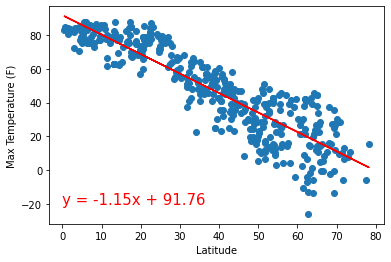

In [14]:
x_axis = NH ['Lat']
y_axis = NH ['Max Temp']

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is: {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")

plt.annotate(line_eq,(0,-20),fontsize=15,color="red")

plt.savefig ("../Images/NHvsLatitude.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
SH = weather_df.loc[weather_df["Lat"] >= 0]
SH.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Country,Wind Speed,Date
0,punta arenas,8.99,125.34,83.64,79,11,PH,6.40,1606375343
1,kapaa,22.08,-159.32,75.20,94,75,US,9.17,1606375344
2,muroto,33.28,134.15,66.20,45,75,JP,5.82,1606375344
4,nikolskoye,59.70,30.79,42.01,93,75,RU,6.71,1606375345
5,adrar,20.50,-10.07,59.92,30,18,MR,4.18,1606375345


The r-value is: -0.89


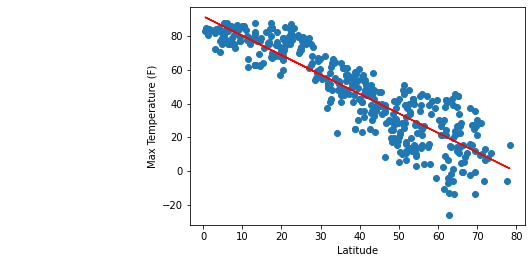

In [16]:
x_axis = SH ['Lat']
y_axis = SH ['Max Temp']

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is: {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")

plt.annotate(line_eq,(-50,90),fontsize=15,color="red")

plt.savefig ("../Images/SHvsLatitude.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.46


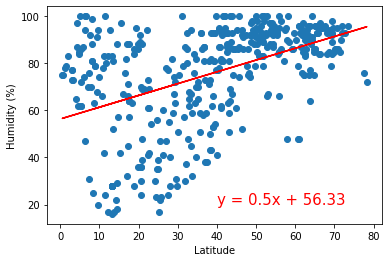

In [17]:
x_axis = NH ['Lat']
y_axis = NH ['Humidity']

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is: {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

plt.savefig("../Images/NH+Latitude+Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.46


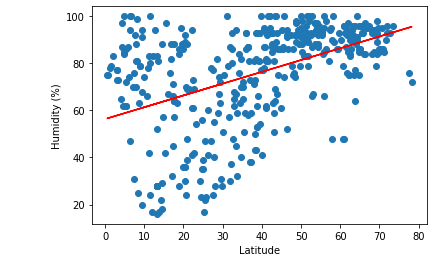

In [18]:
x_axis = SH ['Lat']
y_axis = SH ['Humidity']

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is: {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")

plt.annotate(line_eq,(-25,30),fontsize=15,color="red")

plt.savefig("../Images/SH+Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.24


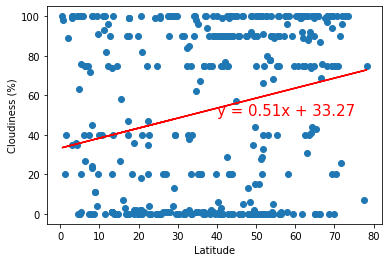

In [19]:
x_axis = NH ['Lat']
y_axis = NH ['Cloudiness']

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is: {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")

plt.annotate(line_eq,(40,50),fontsize=15,color="red")

plt.savefig("../Images/NH+Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.24


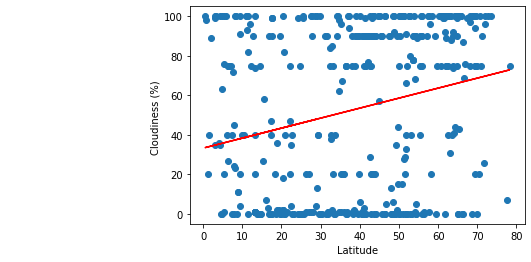

In [20]:
x_axis = SH ['Lat']
y_axis = SH ['Cloudiness']

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%) ")

correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is: {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")

plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

plt.savefig("../Images/SH+Cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09


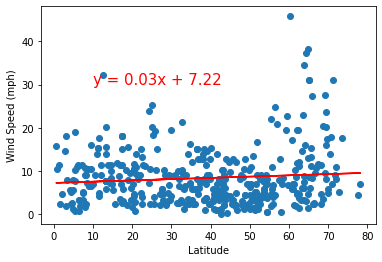

In [21]:
x_axis = NH ['Lat']
y_axis = NH ['Wind Speed']

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is: {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")

plt.annotate(line_eq,(10,30),fontsize=15,color="red")

plt.savefig("../Images/NH+WindSpeed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09


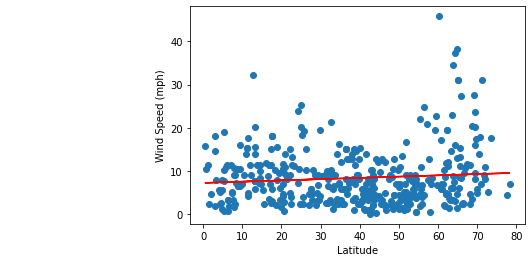

<Figure size 432x288 with 0 Axes>

In [22]:
x_axis = SH ['Lat']
y_axis = SH ['Wind Speed']

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is: {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")

plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.show()

plt.savefig("../Images/SH+WindSpeed.png")
plt.show()